# basic test for brib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

### setup

In [2]:
n=10
tolequi=1e-3
tol=1e-8
w = rexpi.buerrest_getw(n, tol)
print("use n = %d and w = %f. computed for error objective epsilon = %.2e"%(n,w,tol))

use n = 10 and w = 12.445886. computed for error objective epsilon = 1.00e-08


### compute best approximation

In [3]:
r, info = rexpi.brib(w,n,tolequi=tolequi)
success, accuracy, [nodes_pos, equnodes], allerr, tracknodes, nodesphis, timings = info
niter = len(allerr)
errors = [float(e[0]) for e in allerr]
deviations = [float(e[1]) for e in allerr]
print("used %d iterations, error = %.2e, deviation = %.2e"%(niter,errors[-1],deviations[-1]))

used 5 iterations, error = 9.80e-09, deviation = 7.39e-05


### plot  error on

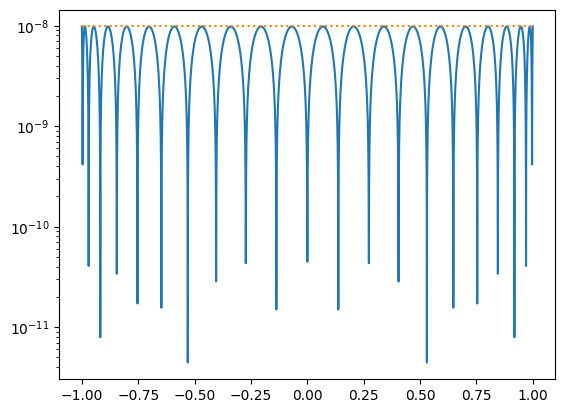

In [4]:

xs = np.linspace(-1,1,5000)
err = r(1j*xs)-np.exp(1j*w*xs)
errmax = np.max(abs(err))
plt.semilogy(xs,abs(err),[-1,1],[errmax,errmax],':');


### plot error in complex plane

<a list of 7 text.Text objects>

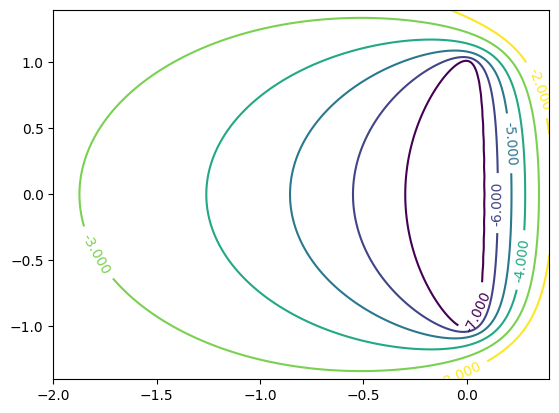

In [5]:
nim=5000
nre=551
ximag = np.linspace(-1.4, 1.4, nim)
#xreal = np.array([0.1])
xreal = np.linspace(-2.0, 0.4, nre)
z = np.array([np.log10(abs(r(xr+1j*ximag)-np.exp(w*(xr+1j*ximag)))) for xr in xreal])

X, Y = np.meshgrid(xreal, ximag)
Z = z.T

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[-7,-6,-5,-4,-3,-2])
ax.clabel(CS, inline=1, fontsize=10)


### plot poles in complex plane

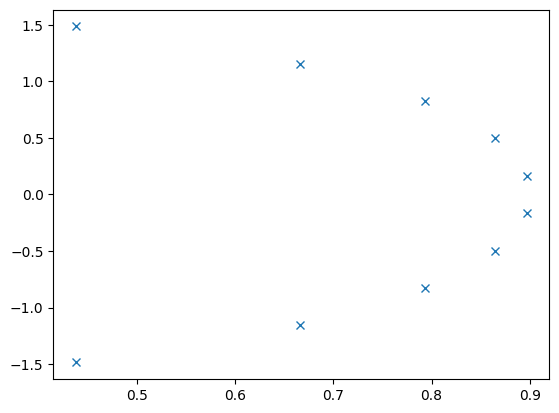

In [6]:
sj = r.getpoles(sym=True)
plt.plot(sj.real,sj.imag,'x')